In [19]:
import pandas as pd
from core.convert_data import class2numeric, norm
import numpy as np
from sklearn.model_selection import train_test_split
from models.LinearClassifier import LinearClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [2]:
data = pd.read_csv("data/mushrooms.csv")
data = class2numeric(data)

In [3]:
Y = data['class']
X = data.drop(['class'], axis=1)
X = norm(X)

In [4]:
Y = np.array(Y)
X = np.array(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [6]:
model = LinearClassifier(X_train, y_train)

In [7]:
def mar():
    margin = model.margin_(X_train, y_train)
    margin = np.sort(np.array(margin))
    plt.grid()
    plt.plot(np.sort(margin))

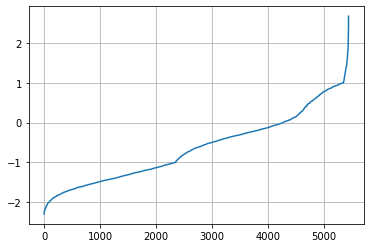

In [8]:
mar()

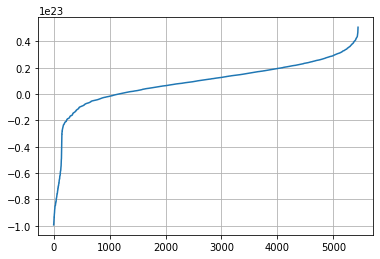

In [9]:
for _ in range(10000):
    model.stochastic_gradient(X_train, y_train, n=5e-3)
mar()

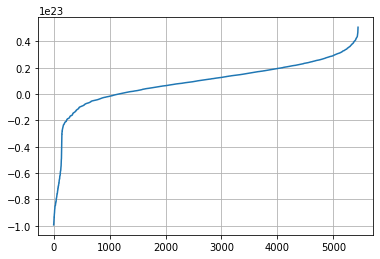

In [10]:
for _ in range(10000):
    model.stochastic_gradient(X_train, y_train, n=5e-3)
mar()

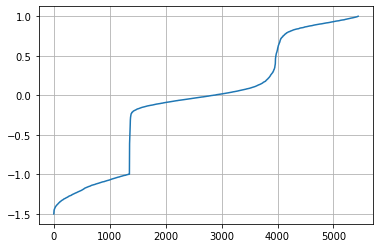

In [11]:
mar()

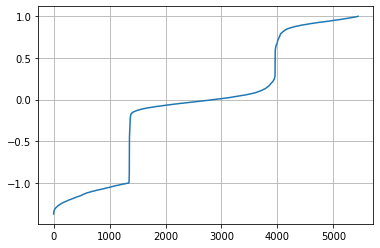

In [12]:
for _ in range(10000):
    model.stochastic_gradient(X_train, y_train, n=5e-3)
mar()

In [17]:
%%time
np.sum(model.predict_(X_test) == y_test) / len(X_test)

CPU times: user 1.28 ms, sys: 229 µs, total: 1.51 ms
Wall time: 1e+03 µs


0.7810518463259978

In [21]:
percept = Perceptron().fit(X_train, y_train)
np.sum(percept.predict(X_test) == y_test) / len(X_test)

1.0